# 1. Linear Regression

### 가상의 데이터로 예측하기

In [ ]:
from sklearn.datasets import make_regression

-  Scikit-Learn의 datasets 서브패키지는 회귀분석용 가상 데이터를 생성하는 명령어인 make_regression()을 제공한다. make_regression()으로 만들어진 데이터는 종속 변수 y의 값이 독립변수 x 벡터의 선형 조합인 선형관계를 가진다.

In [ ]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 10)
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

In [ ]:
print('input data :\n{}, \n\n output data :\n{}'.format(data[0][-10:], data[1][-10:]))

input data :
[[-0.49690917]
 [-1.47226497]
 [ 0.50440136]
 [ 0.94837446]
 [-1.2708988 ]
 [-0.52811776]
 [ 0.14085074]
 [-1.29911506]
 [-0.75551069]
 [ 1.29350965]], 

 output data :
[ 983.45963593  943.2542858  1009.93794944 1037.33090156  953.61516612
  983.50757239 1003.8225329   944.1693651   970.86799626 1032.57937809]


- n_samples : 기본값은 100, 표본 데이터의 갯수, 정수
- n_features : 기본값은 100, 독립변수의 수(차원), 정수
- n_target : 기본값은 1, 종속변수의 수, 정수
- bias = 기본값은 0.0, y절편, 실수
- noise = 기본값은 0.0, 분포

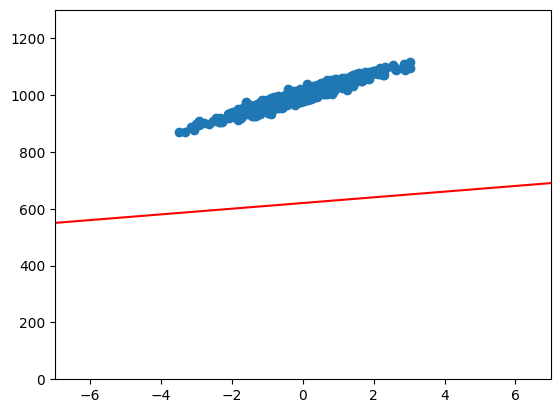

In [ ]:
# 위에서 생성한 가상 데이터 셋을 그래프위에 그려 보았습니다.
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(data[0], data[1])
plt.plot([-7, 7], [550, 690], 'r')
plt.xlim([-7, 7])
plt.ylim([0, 1300])
plt.show()

#### 선형 모델을 만들어 보자.

In [ ]:
from sklearn.model_selection import train_test_split
# train_test_split은 데이터를 학습용 데이터와 검증용 데이터로 분리시켜줍니다.

X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size = 0.2, shuffle = True, random_state=75)

# 생성한 가상의 데이터를 훈련용 데이터와 검증 데이터로 나눠주는 과정입니다.

- train_test_split(data, data2, test_size, train_size, shuffle, random_state)  
  data: 독립변수 데이터  
  data2: 종속변수 데이터 (data 인수에 종속변수가 포함되어 있다면 생략해도 된다.)  
  test_size: 검증용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다. (기본값은 0.25)  
  train_size : 학습용 데이터의 개수. 1이하의 실수로 표현하면 비율을 나타낸다.(test_size와 train_size 중 하나만 사용해도 된다.)  
  shuffle: 데이터를 섞어준다. (기본값은 True)  
  random_state: 난수를 생성해준다.

In [ ]:
X_train[:3]

array([[ 0.45001105],
       [-0.2625724 ],
       [-1.50633273]])

In [ ]:
# 선형회귀(Linear Regression)

from sklearn.linear_model import LinearRegression
# LinearRegression을 import 합니다.

hypothesis = LinearRegression()
# model = LinearRegression()
# import한 LinearRegression을 model이라는 변수에 대입한다.
# 굳이 별도의 변수에 넣어주지 않고 LinearRegression() 으로 사용해도 무방합니다. 여기서는 설명을 위해 변수에 대입하였습니다.

# 단일피쳐 선형회귀 모델의 가설함수는?


y1 = x1의 관계

H(x) = W1*x1 + w0

#### 생성한 모델을 학습시켜보자.

In [ ]:
model_linear = hypothesis.fit(X_train, y_train)
# fit()은 모델을 학습시키는 명령입니다.

# fit 에서 일어나는 일에는 어떤 것들이 있을까?

모델이 학습할 때 일어나는 일들

1. cost 계산  
cost = sum((y_pred - y_real)**2)/N --> MSE (오차 제곱 평균)

2. cost가 가장 작아질 때까지 가중치 update  
```python
for i in range(10000):
    gradientDescent(cost)   # 구한 cost를 통해 기울기 계산하고, weight를 기울기 반대 방향으로 update


#### 생성한 모델의 weight(가중치, 계수)와 bias를 출력해보자.

In [ ]:
model_linear.coef_
# coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열입니다.
# 우리가 생성한 데이터에는 입력 특성이 하나이므로 하나만 출력됩니다.
# coef_ 는 weight값을 보여줍니다.

array([37.16123959])

In [ ]:
model_linear.intercept_
# intercept_ 속성은 항상 실수 값 하나입니다.
# intercept_ 는 bias(y 절편)값을 보여줍니다.

1000.5517557895756

H(x) = model_linear.coef_ * x1 + model_linear.intercept_

#### 우리가 생성한 모델을 검증 해보자.

- score()로 모델을 검증할 수 있다.

In [ ]:
print("train data score : {:.2f}".format(model_linear.score(X_train, y_train)))
print("test data score : {:.2f}".format(model_linear.score(X_test, y_test)))

train data score : 0.93
test data score : 0.94


In [ ]:
# Trainset data 와 함께, Hypothesis (직선) 시각화해보기
# Testset data 와 함께, Hypothesis (직선) 시각화해보기

In [ ]:
import numpy as np
point_x = np.array([-7, 7]).reshape(-1, 1)  # 직선을 만들기 위한 x 값들
model_linear.predict(point_x)   # 예측값

array([ 740.42307868, 1260.6804329 ])

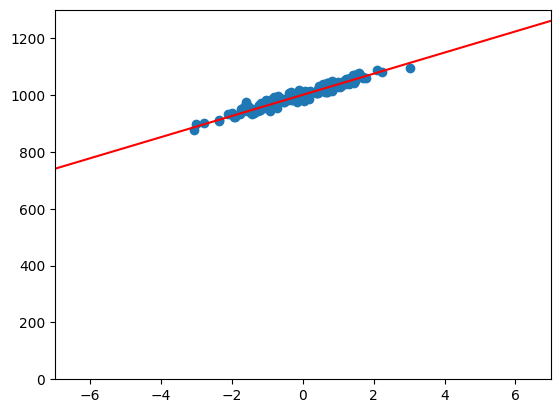

In [ ]:
# 위에서 생성한 가상 데이터 셋을 그래프위에 그려 보았습니다.
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X_test, y_test)
plt.plot(point_x, model_linear.predict(point_x), 'r')
plt.xlim([-7, 7])
plt.ylim([0, 1300])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# 회귀 평가 지표인 mean squared error, R2 score를 불러옵니다.

y_predict = model_linear.predict(X_test)
# predict() 명령어를 사용하여 y값을 예측합니다.

In [ ]:
mse = mean_squared_error(y_test, y_predict)
# 실제 값과 예측값을 이용하여 mean squared error를 측정합니다.

In [ ]:
import numpy as np
rmse = np.sqrt(mse)
# root mean squared error를 측정할 수 있습니다.
# sqrt는 루트를 씌워주는 명령어입니다.

In [ ]:
print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))

MSE : 95.018, RMSE : 9.748


In [ ]:
print('test data score : {:.2f}'.format(r2_score(y_test, y_predict)))
# 실제값과 직접 만들어본 예측값을 이용하여 모델의 성능을 측정할 수 있습니다.

test data score : 0.94


Quiz.
1. 회귀에서 r2 score를 사용하는 이유는 무엇일까?
2. r2_score는 계산하는 식이 어떻게 될까?

Answer.  

1. 내가 사용하는 데이터의 분산 정도를 오차로 나눠줌으로써 어느 정도 일관된 성능평가 지표로 사용할 수 있기 때문

2. 1- (오차/분산) = 1 - MSE / Var(y) = 1 - np.mean((y_predict - y_test)**2) / np.var(y_test)

- score(X_test, y_test)를 실행하게 되면 내부함수에서 X_test를 이용하여 예측값을 생성합니다. 그 후 생성된 예측값과 y_test(실제값)을 이용하여 성능을 검증해줍니다.
- 모델의 성능만을 측정할때는 위의 번거로운 과정없이 score함수만을 활용하면 됩니다.

In [ ]:
1 - np.mean((y_predict - y_test)**2) / np.var(y_test)

0.9402389937667331

#### Linear Regression with Multi-Variable

앞에서는 1개의 특성(feature)을 가진 데이터 셋으로 선형회귀를 해보았다. 지금부터는 여러개의 특성을 가진 데이터 셋으로 션형회귀를 해보자.

In [ ]:
X_multi, y_multi = make_regression(n_samples = 1000, n_features = 100, bias = 10, noise = 50)

print('input data : \n{}, \n\n output data : \n{}'.format(X_multi[:1], y_multi[:1]))

input data : 
[[ 0.15627969 -0.82662234 -0.44877705  1.20558161  0.83177674 -2.14711309
  -0.63817399 -0.36563424  0.44861217  0.13647323 -0.54540322 -0.26293485
  -0.51751795  0.5846631  -0.698803   -0.58509194  0.98775898  0.31166356
  -0.67534565 -0.67791507 -1.72354049  1.16545625 -0.10961916 -0.74142077
   0.58172711 -1.08904817  0.16100598 -0.98738417 -1.87717495 -0.33190308
  -1.56314594 -0.0306359   0.19979096 -0.6331413   0.57565385 -0.47417664
   0.86909267 -1.83064704 -0.75925613 -0.8547499   0.24266248 -0.74887915
   0.37039052 -0.00530446 -0.92321282 -0.0359747   1.43076334 -1.49260225
   1.37930813  0.37165079  0.12024089  0.70895832 -1.17013773 -0.96009553
   0.14293897 -0.64441121  0.95233429 -0.80112022  0.3976765  -0.19626698
  -0.51340697  0.15030764  1.77436587  0.24555223  1.68944435 -1.00292554
  -0.43002056 -0.11845626 -1.53758012  0.01477145 -1.22966457  1.18978668
  -0.07014428  0.49642463  2.55095189  0.20495259 -0.64893655 -0.55264184
  -0.80042677  0.0672727

여기서는 input data를 살펴보도록 하자.
1개의 input data에 100개의 각각 다른 값들이 들어있다. 그 이유는 n_features = 100, 즉 100개의 특성을 가지고 있는 데이터이다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.3, shuffle = True)
# 생성한 가상의 데이터를 학습용과 검증용으로 나눠줍니다.

In [ ]:
hypothesis_multi = LinearRegression()

# 가설함수는 어떻게 될까?
# H(x) = w0 + w1x1 + w2x2 + ... + w100*100

In [ ]:
model_linear_multi = hypothesis_multi.fit(X_train, y_train)
# 모델을 학습시킵니다.

In [ ]:
print('weight : \n{}\n\n'.format(model_linear_multi.coef_))
print('bias : \n{}'.format(model_linear_multi.intercept_))

weight : 
[ 2.08519017e+00 -9.45506651e-01  3.97081357e+01  2.58574241e-01
  7.68245546e-01  9.26878384e+00 -6.99882241e-01 -3.28235742e+00
 -6.97655835e-01 -1.96199365e-01  2.54019348e+00  2.30995936e+00
 -2.05808703e+00  1.99623878e+01  1.23784221e+00  1.06261579e-02
  1.79360867e+00  1.25668958e+01 -5.65087271e-01  1.47601148e+00
  4.76099154e-01 -1.51182136e+00  1.99213191e+00 -6.33529520e-01
  1.69332638e+00 -2.36251496e+00  1.34337671e+00  1.66303712e+00
  2.33144987e+00  1.08447938e+00 -1.60626059e+00 -1.71912474e-01
 -5.02233775e-02  1.67470346e+00 -1.69880723e+00  2.57246264e+00
  4.08366347e+00  8.70932609e-01 -3.22307039e-01 -1.42054615e+00
 -1.41702579e-01 -1.49308183e+00  2.62763499e-01 -3.30439583e+00
 -9.96195471e-01  5.29255306e-01  1.58825173e+00  4.78838168e-01
  3.25386240e+00 -1.67689946e+00  2.70716231e+00 -1.13284060e+00
  2.69833563e+00 -1.19804385e+00 -1.58986894e+00 -1.61260358e+00
  1.74134673e+00  3.33424928e+01 -9.40049384e-01 -2.10562366e+00
 -1.67692399e-0

In [ ]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_test, y_test)))

학습 데이터 점수 : 0.91
검증 데이터 점수 : 0.88


noise = 100

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_2,y_2 = make_regression(n_samples = 1000, n_features = 100, bias = 10, noise = 200)

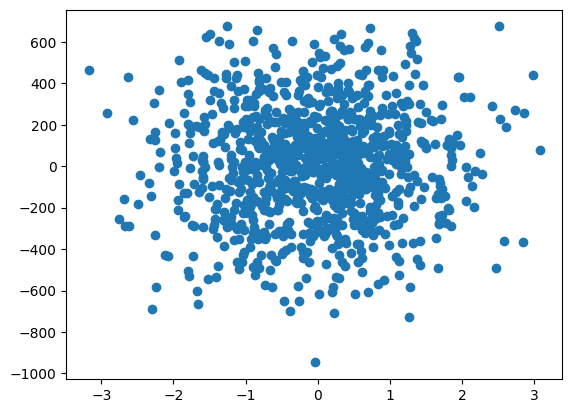

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X_2[:, 11], y_2)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2,
                                                    shuffle = True)
hypothesis_noise100 = LinearRegression()
model_linear_noise100 = hypothesis_noise100.fit(X_train, y_train)

In [ ]:
print('weight : \n{}\n\n'.format(model_linear_noise100.coef_))
print('bias : \n{}'.format(model_linear_noise100.intercept_))

weight : 
[-8.51411852e+00  9.87196296e+00  7.97617131e+01 -3.45050200e+00
 -8.28251948e+00  3.07771768e+00 -6.77742083e+00 -1.90918107e+01
  7.50877392e+00  2.20688180e+00 -6.93420737e+00  2.28808101e+01
  6.35145420e+00 -5.01360753e+00  7.67669058e+01 -5.29784024e+00
 -6.70998206e+00  3.05370998e+01 -2.74364606e+00  1.14078050e+01
 -1.44260932e+00 -1.03270970e+01  1.78241982e+01  3.30677726e+00
  8.79375763e+00  2.60799002e+00  1.92955404e+00 -3.20399508e+00
 -2.45114126e+00  1.25045770e+01  1.69524043e+01 -2.92240274e+00
  6.65664282e+00 -4.57577540e-02 -1.37396204e+01 -8.60762694e+00
 -6.87771609e+00  2.21028538e+00 -3.45003115e+00  8.75104052e+00
 -1.79250460e+00 -4.09829489e+00 -5.00226608e+00 -1.20710717e+01
 -1.97773760e+00 -9.08655905e+00  1.36383170e+01  5.63856578e+00
 -2.22001414e+01  4.23604727e+00 -1.14630806e+00 -2.71569784e+00
  1.62316937e+01 -8.55548621e-01 -3.04719377e+00 -2.22774876e+00
 -3.98545365e+00 -6.62240936e+00 -2.19545872e+00 -1.64592651e+00
 -6.59267324e+0

In [ ]:
print('학습 데이터 점수 : {:.2f}'.format(model_linear_noise100.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_noise100.score(X_test, y_test)))

학습 데이터 점수 : 0.49
검증 데이터 점수 : 0.40


make_regression을 이용해 가상 데이터를 생성할 때 noise의 값에 따른 결과를 보여주고 있다.

### 보스턴 주택데이터 예측하기

In [ ]:
from sklearn.datasets import load_boston

ImportError: ignored

In [ ]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
np.hstack([A, B]), np.vstack([A, B])

(array([1, 2, 3, 4, 5, 6]),
 array([[1, 2, 3],
        [4, 5, 6]]))

In [113]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [114]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [124]:
boston = fetch_openml(name='boston', as_frame=True)
boston

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [116]:
boston['data']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [117]:
boston['target']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [118]:
boston['feature_names']

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [119]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [120]:
data.shape, target.shape

((506, 13), (506,))

In [ ]:
train_test_split?

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.2,
                                                    shuffle=True)

In [ ]:
LinearRegression?

In [121]:
from sklearn.linear_model import LinearRegression

hypothesis = LinearRegression()

model_boston = hypothesis.fit(X_train, y_train)

print('learning finished..')
print('coef_: {}'.format(model_boston.coef_))
print()
print('bias: {}'.format(model_boston.intercept_))

learning finished..
coef_: [-1.01763947e-01  5.70064805e-02 -2.99871086e-03  2.89515146e+00
 -1.85027384e+01  3.26821949e+00  9.28879954e-03 -1.61465415e+00
  3.15090662e-01 -1.26012782e-02 -9.84504721e-01  8.95898886e-03
 -5.65017721e-01]

bias: 41.75081120241612


In [122]:
model_boston.score(X_train, y_train), model_boston.score(X_test, y_test)

(0.718968466152734, 0.8258677988365956)

In [123]:
model_boston.predict(X_test)

array([30.76304292, 32.48293228, 31.97435112, 14.54041832, 16.3644015 ,
       21.92744237, 16.28461118, 35.90253641, 20.85634427, 11.66618579,
       31.62745766, 34.89330863, 21.27725716, 27.2965473 , 30.92731175,
       12.91720333, 23.19075718, 15.74921822,  7.68652449, 13.07083892,
       43.23990023, 20.26349464, 18.77197685, 18.89882188, 21.49010554,
       38.07594624, 20.69993503, 36.48849155, 30.75632271, 22.50598636,
       23.53882216, 22.84581162, 22.2455529 , 17.55492748, 14.31456797,
       30.49819517, 13.26269557, 19.39300918, 20.90655595, 40.75285983,
       20.04841182, 24.1308979 , 31.79176258, 25.17596064, 19.29297921,
        8.31910573,  4.5648482 , 16.41769328, 15.71125062, 32.31357546,
       35.94722226, 25.26468131, 13.2881669 , 29.43861181, 28.85485537,
       22.78331535, 26.89605148, 11.47941423, 23.23724769, 24.10669784,
       29.75364913, 34.65562256, 20.4562631 , 20.53517707, 21.06064412,
       35.99189923, 19.93322175, 23.49409379, 19.76200777, 20.48